Name:  Abolfazl Eshagh         
Student ID: 99101105

**Part 1**

 Write two functions named "camera_matrix" and "camera_projection". The first one gets all the camera parameters, containing λ, f (focal length), Sx, Sy, Sθ, Ox, Oy, R, T, and returns the camera matrix (Please provide comments above each stage of transformation). The second function projects a given 3D point on image and returns a 2D point in pixel coordinates.

In [82]:

import numpy as np
def camera_matrix(lamda, f, Sx, Sy, Stheta, Ox, Oy, R, T):
    # Define the intrinsic matrix K
    K = np.array([[lamda * f, Stheta, Ox],
                  [0, lamda * f, Oy],
                  [0, 0, 1]])

    # Define the extrinsic matrix [R | T]
    RT = np.hstack((R, T.reshape(-1, 1)))

    # Compute the camera matrix
    P = np.dot(K, RT)

    return P
def camera_projection(P, X):
    # Convert 3D point to homogeneous coordinates
    X = np.append(X, 1)

    # Project 3D point onto image plane
    x = np.dot(P, X)

    # Convert to pixel coordinates
    x = x / x[2]

    return x[:2]


**Part 2**

Consider a pinhole camera with center located at (1, 1, -3), which its focal length is 100, scale factors (Sx, Sy) are both 1 and pixel coordinates of principal point is (50, 50). Also skew parameter is zero. The angle of the camera is such that the optical axis of the camera is parallel to the z axis. Using the previous function obtain the whole camera matrix.

In [83]:

# Define the camera parameters
lamda = 1.0
T = np.array([1, 1, -3])
f = 100
Sx = 1
Sy = 1
Ox = 50
Oy = 50
Stheta = 0 
rotation_matrix = np.eye(3)
translation_vector = -T 

# Calculate camera matrix
P = camera_matrix(lamda, f, Sx, Sy, Stheta, Ox, Oy, rotation_matrix, translation_vector)

print("The camera matrix is:\n", P)

The camera matrix is:
 [[100.   0.  50.  50.]
 [  0. 100.  50.  50.]
 [  0.   0.   1.   3.]]


**Part 3**

Suppose that vector V: (0, 1, 1) is located at (1, 1, 3) in 3D space. Apply the obtained camera matrix to V. Plot the result in pixel coordinates in a 2D plot. From which step of projection the length of the vector changes?

the projection:  [25. 50.]


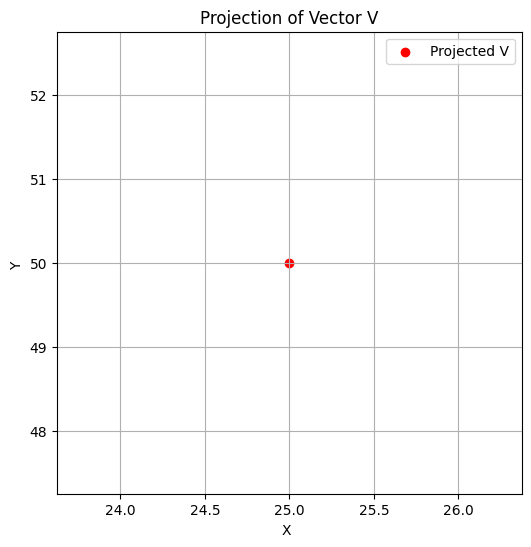

In [84]:

# Define the 3D point V
V = np.array([0, 1, 1])

x = camera_projection(P, V)
print("the projection: ", x)
plt.figure(figsize=(6, 6))
plt.scatter(x[0], x[1], color='red', label='Projected V')
plt.title('Projection of Vector V')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.legend()
plt.grid(True)
plt.show()

**Part 4**

If the camera is rotated by +25 degrees around x axis, how would R and T change? What would the final image be?

In [85]:
from scipy.spatial.transform import Rotation


# Original rotation matrix (identity matrix for the current scenario)
original_T = np.eye(3)

# Convert rotation angle to radians
rotation_radian = np.radians(25.0)

# Create a rotation object and apply the rotation around the x-axis
rotation = Rotation.from_euler('x', rotation_radian, degrees=False)
new_T = rotation.apply(original_T)

# Display the new rotation matrix
print("New Rotation Matrix:")
print(new_T)
print("Original Rotation Matrix:")
print(original_T)


New Rotation Matrix:
[[ 1.          0.          0.        ]
 [ 0.          0.90630779  0.42261826]
 [ 0.         -0.42261826  0.90630779]]
Original Rotation Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


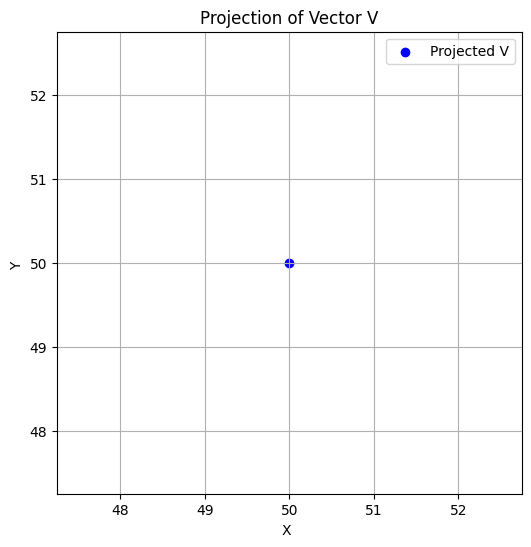

In [87]:
# updated_P = camera_matrix(1.0, focal_length, scale_factors[0], scale_factors[1], 1.0, principal_point[0], principal_point[1], new_rotation_matrix, translation_vector)

x_input = np.array([V_3D[0], V_3D[1], V_3D[2]])
x, y = camera_projection(P,x_input)
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='blue', label='Projected V')
plt.title('Projection of Vector V')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.legend()
plt.grid(True)
plt.show()